<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningPyTorch/blob/main/Deep_Learning_with_PyTorch_01_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with PyTorch - Chapteer 01
A simple Regression Problem



code examples from https://github.com/dvgodoy/PyTorchStepByStep/blob/master/Chapter01.ipynb

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn


In [3]:
# Install torchviz from git repository
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master

  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-qt54fyt_
  Running command git clone -q https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-qt54fyt_
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4990 sha256=4d855466207f7a2cea1b1157b805b832eaabaa84ea2201d2da55c916b3742c04
  Stored in directory: /tmp/pip-ephem-wheel-cache-8eoaw3ue/wheels/69/06/fd/652908d49c931cdcca96be3c727fb11ed777a3a62402210396
Successfully built torchviz


In [4]:
from torchviz import make_dot

In [24]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from mpl_toolkits.mplot3d import Axes3D

In [29]:
true_b = 1
true_w = 2

n = 100

In [30]:
np.random.seed(42)
x = np.random.rand(n,1)
e = (0.1 * np.random.rand(n,1))
y = true_b + true_w*x + e

In [31]:
x[0:5]

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864]])

In [32]:
idx = np.arange(n)
idx[0:5]

array([0, 1, 2, 3, 4])

In [33]:
np.random.shuffle(idx)
idx[0:5]

array([96, 11, 54, 51, 41])

In [34]:
idx.shape

(100,)

In [35]:
train_idx = idx[:int(n*0.8)]
val_idx = idx[int(n*0.8):]

In [36]:
# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [37]:
def figure1(x_train, y_train, x_val, y_val):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    ax[0].scatter(x_train, y_train)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_ylim([0, 3.1])
    ax[0].set_title('Generated Data - Train')

    ax[1].scatter(x_val, y_val, c='r')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_ylim([0, 3.1])
    ax[1].set_title('Generated Data - Validation')
    fig.tight_layout()
    
    return fig, ax

(<Figure size 1152x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b9a30ed10>,
       dtype=object))

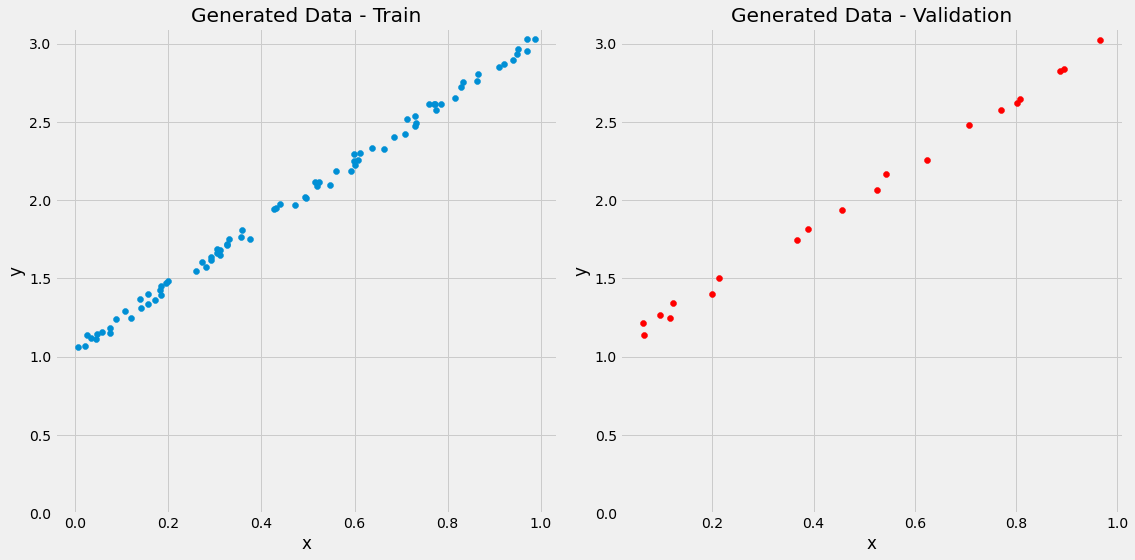

In [38]:
figure1(x_train, y_train, x_val, y_val)

# step 0 --> random initialization

In [39]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b,w)

[0.49671415] [-0.1382643]


# step 1 --> model's prediction

In [41]:
yhat = b + w * x_train
yhat[0:5]

array([[0.42443886],
       [0.36261025],
       [0.41404593],
       [0.38954095],
       [0.42824886]])

# step 2 --> compute the loss

In [42]:
error = (yhat-y_train)

In [43]:
loss = (error **2).mean()
loss

2.808129216295391

# step 3 --> compute the gradients

In [44]:
b_grad = 2 * error.mean()
w_grad = 2 * (x_train*error).mean()
b_grad,w_grad

(-3.108262701823821, -1.8206663430690853)

# step 4 --> updat the parameters

In [45]:
lr = 0.1
print(b, w)

b = b -lr * b_grad
w = w- lr * w_grad
print(b,w)

[0.49671415] [-0.1382643]
[0.80754042] [0.04380233]
